# 可视化分析商品(bra)的特点

In [1]:
'''导入需要的包'''
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')    # 设置绘图风格
# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 28, 18
import warnings    # 忽略错误提示信息
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签

In [2]:
'''导入数据，读取CSV数据'''
df_data = pd.read_csv("D:/Python_Homework/2020.11.18/bra/bra.csv")
color_data = pd.read_csv("D:/Python_Homework/2020.11.18/bra/colors.csv")

In [3]:
'''查看数据属性'''
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15497 entries, 0 to 15496
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   creationTime  15497 non-null  object
 1   productColor  15496 non-null  object
 2   productSize   15496 non-null  object
dtypes: object(3)
memory usage: 363.3+ KB


In [4]:
'''查看颜色数据属性'''
color_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  118 non-null    int64 
 1   0           117 non-null    object
 2   1           117 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


## 查看数据信息

In [5]:
'''查看数据信息'''
df_data.head(10)

,creationTime,productColor,productSize
0,2016-06-08 17:17:00,22咖啡色,75C
1,2017-04-07 19:34:25,22咖啡色,80B
2,2016-06-18 19:44:56,02粉色,80C
3,2017-08-03 20:39:18,22咖啡色,80B
4,2016-07-06 14:02:08,22咖啡色,75B
5,2017-03-18 11:49:55,22咖啡色,80B
6,2017-01-13 13:43:06,22咖啡色,80B
7,2016-07-10 22:22:56,22咖啡色,80B
8,2016-07-15 14:34:23,22咖啡色,80B
9,2017-03-27 12:54:43,22咖啡色,70C


In [6]:
df_data.tail(10)    # 查看后十个数据

,creationTime,productColor,productSize
15487,2017-11-06 10:52:05,肤色,36B/80B
15488,2017-11-15 09:54:41,粉色,34A/75A
15489,2017-11-14 12:31:10,粉色,36B/80B
15490,2017-11-17 10:30:42,浅紫,34B/75B
15491,2017-11-17 10:30:31,肤色,34B/75B
15492,2017-10-28 22:39:44,粉色,38B/85B
15493,2017-11-11 00:13:32,粉色套装（含内裤）,36C/80C
15494,2017-11-01 14:41:08,黑色,34A/75A
15495,2017-10-31 18:40:09,粉色,34B/75B
15496,2017-11-07 18:38:14,黑色,36A/80A


In [7]:
'''查看颜色数据信息'''
color_data.head(10)

,Unnamed: 0,0,1
0,0,22咖啡色,棕色
1,1,02粉色,粉色
2,2,071蓝色,蓝色
3,3,071黑色,黑色
4,4,071肤色,肤色
5,5,0993无痕肤色,肤色
6,6,0993无痕黑色,黑色
7,7,071红色,红色
8,8,0993无痕酒红色,红色
9,9,h03无痕蓝灰,蓝色


In [8]:
'''定义函数清洗数据'''
def clean_data(df_data, color_data):
    '''清洗颜色数据'''
    df_data = pd.merge(df_data, color_data, left_on='productColor', right_on='0')    # 使用merge合并两个数据
    df_data = df_data.drop(columns=['productColor', 'Unnamed: 0', '0']).rename(columns={'1':'productColor'})
    
    '''设置尺码的正则表达式'''
    pattern_one = re.compile(r'[7-9]\d[A-Z]')
    pattern_two = re.compile(r'[A-Z][7-9]\d')
    pattern_three = re.compile(r'\d{2}/\d{2}[A-Z]')
    for i in range(len(df_data)):
        try:
            
            '''清洗尺码'''
            re_data_one = pattern_one.findall(df_data['productSize'][i])
            re_data_two = pattern_two.findall(df_data['productSize'][i])
            re_data_three = pattern_three.findall(df_data['productSize'][i])
            
            if re_data_one:
                df_data['productSize'][i] = re_data_one[0]
            if re_data_two:
                df_data['productSize'][i] = df_data['productSize'][i][1:] + df_data['productSize'][i][0]
            if re_data_three:
                df_data['productSize'][i] = max(re.compile(r'\d{2}').findall(df_data['productSize'][i])) + df_data['productSize'][i][-1]
            
            else:
                continue
        except:
            continue
            
    return df_data
            

In [9]:
df_data = clean_data(df_data, color_data)
df_data.dropna(axis=0, how='any', inplace=True)    #删除缺失值
df_data.reset_index(drop=True)    #重设索引

,creationTime,productSize,productColor
0,2016-06-08 17:17:00,75C,棕色
1,2017-04-07 19:34:25,80B,棕色
2,2017-08-03 20:39:18,80B,棕色
3,2016-07-06 14:02:08,75B,棕色
4,2017-03-18 11:49:55,80B,棕色
...,...,...,...
15491,2017-11-03 16:39:13,75A,粉色
15492,2017-11-07 23:03:10,75B,粉色
15493,2017-11-14 17:25:37,75A,粉色
15494,2017-11-11 00:13:32,80C,粉色


In [10]:
'''查看清洗数据后的数据'''
df_data.head(15)

,creationTime,productSize,productColor
0,2016-06-08 17:17:00,75C,棕色
1,2017-04-07 19:34:25,80B,棕色
2,2017-08-03 20:39:18,80B,棕色
3,2016-07-06 14:02:08,75B,棕色
4,2017-03-18 11:49:55,80B,棕色
5,2017-01-13 13:43:06,80B,棕色
6,2016-07-10 22:22:56,80B,棕色
7,2016-07-15 14:34:23,80B,棕色
8,2017-03-27 12:54:43,70C,棕色
9,2016-06-19 10:38:05,80C,棕色


## 整理颜色与尺码的数据

In [11]:
'''提取颜色信息'''
color_info = df_data['productColor'].value_counts(ascending=True)
color = color_info.keys()
color_count = color_info.values

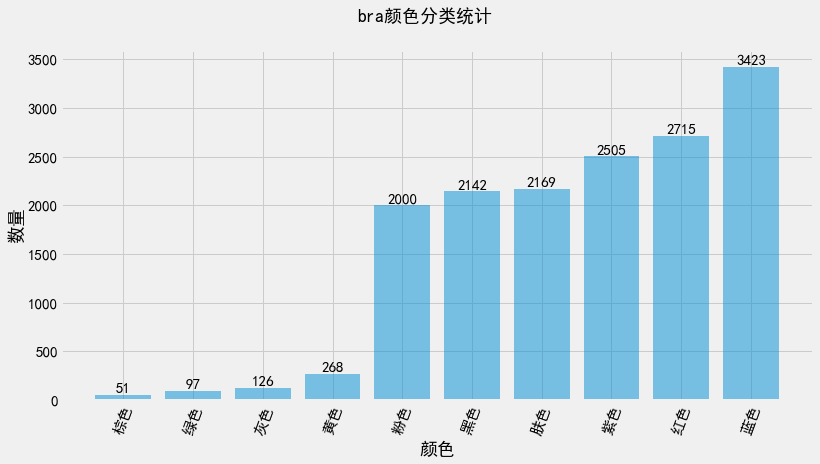

In [17]:
'''绘制颜色的直方图'''
fig, ax = plt.subplots(figsize=(12,6))
x_label = color
x_tick = np.arange(len(color))
plt.bar(x_tick, color_count, align = 'center', alpha = 0.5)
fig.suptitle(u"bra颜色分类统计", fontsize= 18)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('数量', fontsize = 18)
plt.xlabel('颜色', fontsize = 18)
for a,b in zip(x_tick, color_count):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=15)
plt.show()

对内衣颜色的统计信息绘制柱形图，由结果可知：蓝色内衣的需求最大，红色次之，紫色排第三，棕色内衣的需求最小。

In [13]:
'''提取尺码信息'''
size_info = df_data['productSize'].value_counts(ascending=True)
size = size_info.keys()
size_count = size_info.values

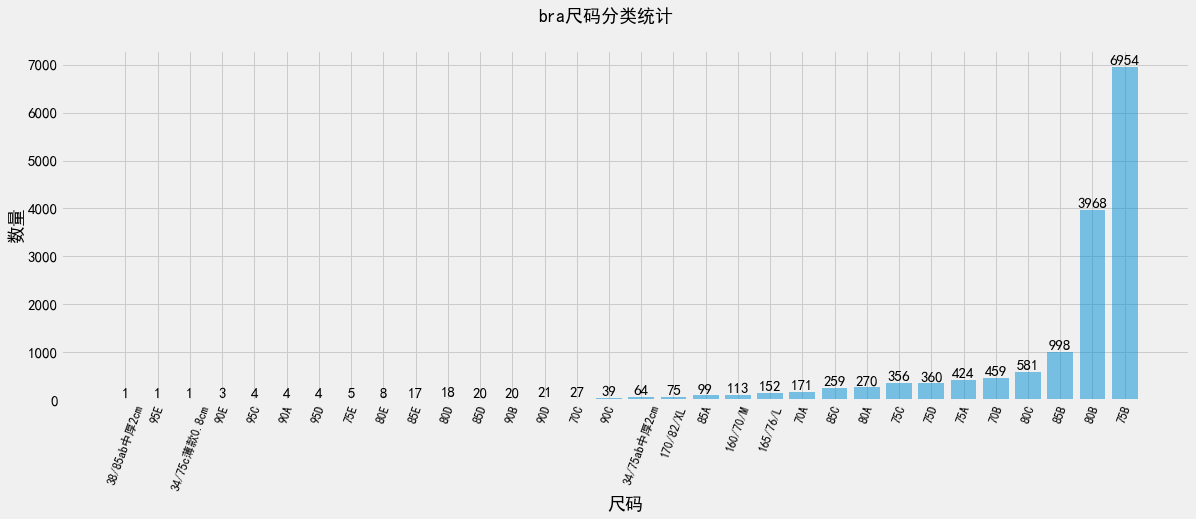

In [18]:
fig, ax = plt.subplots(figsize=(18,6))
x_label = size
x_tick = np.arange(len(size))
plt.bar(x_tick, size_count, align = 'center', alpha = 0.5)
fig.suptitle(u"bra尺码分类统计", fontsize= 18)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 12)
plt.yticks(fontsize = 15)
plt.xlabel('尺码', fontsize = 18)
plt.ylabel('数量', fontsize = 18)
for a,b in zip(x_tick, size_count):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=15)
plt.show()

对内衣尺码的统计信息绘制柱形图，由结果可知：75B内衣的需求最大，80B次之，85B排第三。